In [1]:
#logistic regression 

In [2]:
import pandas as pd
#Dataframe
df =pd.read_csv('../dataset_smote.csv')


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Séparation des features (X) et de la variable cible (y)
X = df.drop('isFraud', axis=1)
y = df['isFraud']

# Division des données en ensembles d'entraînement, de validation et de test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_validation, X_test, y_validation, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)



In [4]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(random_state=1)
logmodel.fit(X_train,y_train)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=1)

In [5]:
from sklearn.metrics import roc_auc_score

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


# Prédiction sur l'ensemble de validation

y_pred_validation = logmodel.predict(X_validation)

# Calcul des métriques sur l'ensemble de validation
accuracy_validation = accuracy_score(y_validation, y_pred_validation)
precision_validation = precision_score(y_validation, y_pred_validation)
recall_validation = recall_score(y_validation, y_pred_validation)
f1_validation = f1_score(y_validation, y_pred_validation)
auc_validation = roc_auc_score(y_validation, y_pred_validation)

# Affichage des métriques sur l'ensemble de validation
print("Métriques sur l'ensemble de validation:")
print(f"Accuracy: {accuracy_validation:.2f}")
print(f"Precision: {precision_validation:.2f}")
print(f"Recall: {recall_validation:.2f}")
print(f"F1-Score: {f1_validation:.2f}")
print(f"auc-Score: {auc_validation:.2f}")


Métriques sur l'ensemble de validation:
Accuracy: 0.66
Precision: 0.68
Recall: 0.62
F1-Score: 0.64
auc-Score: 0.66


In [6]:
# Prédiction sur l'ensemble de test

y_pred_test = logmodel.predict(X_test)

# Calcul de l'AUC
auc = roc_auc_score(y_test, y_pred_test)


# Calcul des métriques sur l'ensemble de test

acc = accuracy_score(y_test, y_pred_test)
prec = precision_score(y_test, y_pred_test)
rec = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)

lr_results = pd.DataFrame([['Logistic regression', acc, prec, rec, f1, auc]],
               columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC'])

# Sauvegardez le DataFrame dans un fichier CSV
lr_results.to_csv('../evaluations/lr_results.csv', index=False)

lr_results


,Model,Accuracy,Precision,Recall,F1 Score,AUC
0,Logistic regression,0.661661,0.678199,0.61528,0.645209,0.661662


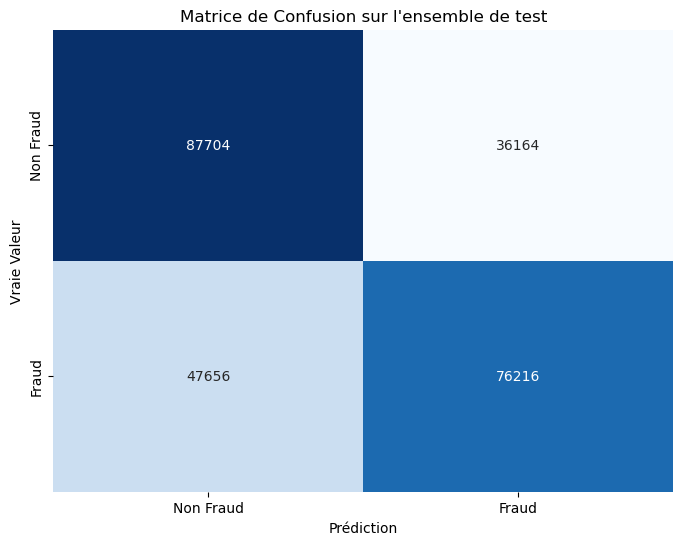

In [7]:

# Matrice de confusion sur l'ensemble de test
conf_matrix = confusion_matrix(y_test, y_pred_test)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Non Fraud', 'Fraud'], yticklabels=['Non Fraud', 'Fraud'])
plt.xlabel('Prédiction')
plt.ylabel('Vraie Valeur')
plt.title('Matrice de Confusion sur l\'ensemble de test')
plt.show()
